In [1]:
!pip install pymorphy2
!pip install emoji
!pip install transformers datasets torch sklearn iterative-stratification


  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55.5/55.5 kB 228.0 kB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.2/8.2 MB 50.3 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=d69f77c01b6a67c639ea742c7cba623fd219f8ac4a9ed226cfdcaf5286204465
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 590.6/590.6 kB 11.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  √ó python setup.py egg_info did not run successfully.
  ‚îÇ exit code: 1
  ‚ï∞‚îÄ> See above for output.
  
  note: This error originates from a subpro

In [2]:
import pandas as pd
import re
import pymorphy2
from tqdm import tqdm
import os
import emoji

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ—Ä—Ñ–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞—Ç–æ—Ä–∞
try:
    morph = pymorphy2.MorphAnalyzer()
    # –¢–µ—Å—Ç —Ä–∞–±–æ—Ç—ã –∞–Ω–∞–ª–∏–∑–∞—Ç–æ—Ä–∞
    test_verb = morph.parse('—Ä–µ—à–∏–ª–∏')[0]
    if not any(tag in test_verb.tag for tag in ['INFN', 'VERB']):
        raise RuntimeError("–ê–Ω–∞–ª–∏–∑–∞—Ç–æ—Ä –Ω–µ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –≥–ª–∞–≥–æ–ª—ã –ø—Ä–∞–≤–∏–ª—å–Ω–æ")
except Exception as e:
    print(f"–û—à–∏–±–∫–∞ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ pymorphy2: {e}")
    morph = None

# –°–ª–æ–≤–∞—Ä—å –∑–∞–º–µ–Ω—ã —ç–º–æ–¥–∑–∏ (–±–µ–∑ –Ω–∏–∂–Ω–∏—Ö –ø–æ–¥—á–µ—Ä–∫–∏–≤–∞–Ω–∏–π)
EMOJI_MAP = {
    "üòÄ": "—É–ª—ã–±–∫–∞", "üòÅ": "—Ä–∞–¥–æ—Å—Ç—å", "üòÇ": "—Å–º–µ—Ö", "ü§£": "—Ö–æ—Ö–æ—Ç",
    "üòÉ": "—Ä–∞–¥–æ—Å—Ç—å", "üòÑ": "—Å—á–∞—Å—Ç—å–µ", "üòÖ": "–æ–±–ª–µ–≥—á–µ–Ω–∏–µ",
    "üòÜ": "–≤–µ—Å–µ–ª—å–µ", "üòâ": "–ø–æ–¥–º–∏–≥–∏–≤–∞–Ω–∏–µ", "üòä": "—É–¥–æ–≤–æ–ª—å—Å—Ç–≤–∏–µ",
    "üòã": "–≤–∫—É—Å–Ω—è—Ç–∏–Ω–∞", "üòé": "–∫—Ä—É—Ç–æ", "üòç": "–æ–±–æ–∂–∞–Ω–∏–µ",
    "üòò": "–≤–æ–∑–¥—É—à–Ω—ã–π –ø–æ—Ü–µ–ª—É–π", "üòó": "–ø–æ—Ü–µ–ª—É–π", "üòô": "–Ω–µ–∂–Ω—ã–π –ø–æ—Ü–µ–ª—É–π",
    "üòö": "—Ü–µ–ª–æ–≤–∞–Ω–∏–µ", "ü§ó": "–æ–±—ä—è—Ç–∏—è", "ü§©": "–≤–æ—Å—Ç–æ—Ä–≥",
    "ü§î": "–∑–∞–¥—É–º—á–∏–≤–æ—Å—Ç—å", "ü§®": "–ø–æ–¥–æ–∑—Ä–µ–Ω–∏–µ", "üòê": "–Ω–µ–π—Ç—Ä–∞–ª—å–Ω–æ",
    "üòë": "–±–µ–∑—ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω–æ", "üò∂": "–º–æ–ª—á–∞–Ω–∏–µ", "üòè": "—É—Ö–º—ã–ª–∫–∞",
    "üò£": "—Å—Ç—Ä–∞–¥–∞–Ω–∏–µ", "üò•": "—Ä–∞–∑–æ—á–∞—Ä–æ–≤–∞–Ω–∏–µ", "üòÆ": "—É–¥–∏–≤–ª–µ–Ω–∏–µ",
    "ü§ê": "–º–æ–ª—á–æ–∫", "üòØ": "–∏–∑—É–º–ª–µ–Ω–∏–µ", "üò™": "—Å–æ–Ω–ª–∏–≤–æ—Å—Ç—å",
    "üò´": "—É—Å—Ç–∞–ª–æ—Å—Ç—å", "üò¥": "—Å–æ–Ω", "üòå": "–æ–±–ª–µ–≥—á–µ–Ω–∏–µ",
    "üòõ": "–¥—Ä–∞–∑–Ω–∏–ª–∫–∞", "üòú": "—à—É—Ç–∫–∞", "üòù": "–ø—Ä–∏–∫–æ–ª",
    "ü§§": "—Å–ª—é–Ω–∫–∏", "üòí": "–Ω–µ–¥–æ–≤–æ–ª—å—Å—Ç–≤–æ", "üòì": "–ø–æ—Ç —Å–æ –ª–±–∞",
    "üòî": "–≥—Ä—É—Å—Ç—å", "üòï": "–Ω–µ–ø–æ–Ω–∏–º–∞–Ω–∏–µ", "üôÉ": "–Ω–∞–∏–∑–Ω–∞–Ω–∫—É",
    "ü§ë": "–∂–∞–¥–Ω–æ—Å—Ç—å", "üò≤": "—à–æ–∫", "üôÑ": "–∑–∞–∫–∞—Ç—ã–≤–∞–Ω–∏–µ –≥–ª–∞–∑",
    "üò∑": "–º–∞—Å–∫–∞", "ü§í": "—Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "ü§ï": "—Ç—Ä–∞–≤–º–∞",
    "ü§¢": "—Ç–æ—à–Ω–æ—Ç–∞", "ü§Æ": "—Ä–≤–æ—Ç–∞", "ü§ß": "—á–∏—Ö–∞–Ω–∏–µ",
    "üòµ": "–≥–æ–ª–æ–≤–æ–∫—Ä—É–∂–µ–Ω–∏–µ", "ü§Ø": "–≤–∑—Ä—ã–≤ –º–æ–∑–≥–∞", "üò†": "–∑–ª–æ—Å—Ç—å",
    "üò°": "—è—Ä–æ—Å—Ç—å", "ü§¨": "—Ä—É–≥–∞–Ω—å", "üòà": "–¥–æ–±—Ä—ã–π –¥—å—è–≤–æ–ª",
    "üëø": "–∑–ª–æ–π –¥—å—è–≤–æ–ª", "üëπ": "–æ–≥—Ä", "üë∫": "–≥–æ–±–ª–∏–Ω",
    "üíÄ": "—á–µ—Ä–µ–ø", "üëª": "–ø—Ä–∏–≤–∏–¥–µ–Ω–∏–µ", "üëΩ": "–∏–Ω–æ–ø–ª–∞–Ω–µ—Ç—è–Ω–∏–Ω",
    "ü§ñ": "—Ä–æ–±–æ—Ç", "üò∫": "–∫–æ—Ç —Ä–∞–¥–æ—Å—Ç—å", "üò∏": "–∫–æ—Ç —Å—á–∞—Å—Ç—å–µ",
    "üòπ": "–∫–æ—Ç —Å–ª–µ–∑—ã —Ä–∞–¥–æ—Å—Ç–∏", "üòª": "–∫–æ—Ç –æ–±–æ–∂–∞–Ω–∏–µ",
    "üòº": "–∫–æ—Ç —É—Ö–º—ã–ª–∫–∞", "üòΩ": "–∫–æ—Ç –ø–æ—Ü–µ–ª—É–π", "üôÄ": "–∫–æ—Ç —à–æ–∫",
    "üòø": "–∫–æ—Ç –≥—Ä—É—Å—Ç—å", "üòæ": "–∫–æ—Ç –∑–ª–æ—Å—Ç—å", "üë∂": "–º–ª–∞–¥–µ–Ω–µ—Ü",
    "üßí": "—Ä–µ–±–µ–Ω–æ–∫", "üë¶": "–º–∞–ª—å—á–∏–∫", "üëß": "–¥–µ–≤–æ—á–∫–∞",
    "üë®": "–º—É–∂—á–∏–Ω–∞", "üë©": "–∂–µ–Ω—â–∏–Ω–∞", "üë¥": "–¥–µ–¥—É—à–∫–∞",
    "üëµ": "–±–∞–±—É—à–∫–∞", "üëÆ": "–ø–æ–ª–∏—Ü–µ–π—Å–∫–∏–π", "üë∑": "—Å—Ç—Ä–æ–∏—Ç–µ–ª—å",
    "üíÇ": "–≥–≤–∞—Ä–¥–µ–µ—Ü", "üïµÔ∏è": "–¥–µ—Ç–µ–∫—Ç–∏–≤", "üë©‚Äç‚öïÔ∏è": "–≤—Ä–∞—á",
    "üë®‚Äç‚öïÔ∏è": "–¥–æ–∫—Ç–æ—Ä", "üë©‚Äçüåæ": "—Ñ–µ—Ä–º–µ—Ä",
    "üë®‚Äçüåæ": "—Ñ–µ—Ä–º–µ—Ä –º—É–∂—á–∏–Ω–∞", "üë©‚Äçüç≥": "–ø–æ–≤–∞—Ä", "üë®‚Äçüç≥": "–ø–æ–≤–∞—Ä –º—É–∂—á–∏–Ω–∞",
    "üë©‚Äçüéì": "—Å—Ç—É–¥–µ–Ω—Ç–∫–∞", "üë®‚Äçüéì": "—Å—Ç—É–¥–µ–Ω—Ç", "üë©‚Äçüé§": "–ø–µ–≤–∏—Ü–∞",
    "üë®‚Äçüé§": "–ø–µ–≤–µ—Ü", "üë©‚Äçüè´": "—É—á–∏—Ç–µ–ª—å–Ω–∏—Ü–∞",
    "üë®‚Äçüè´": "—É—á–∏—Ç–µ–ª—å", "üë©‚Äçüè≠": "—Ä–∞–±–æ—á–∞—è", "üë®‚Äçüè≠": "—Ä–∞–±–æ—á–∏–π",
    "üë©‚Äçüíª": "–ø—Ä–æ–≥—Ä–∞–º–º–∏—Å—Ç–∫–∞", "üë®‚Äçüíª": "–ø—Ä–æ–≥—Ä–∞–º–º–∏—Å—Ç",
    "üë©‚Äçüíº": "–æ—Ñ–∏—Å–Ω–∞—è —Ä–∞–±–æ—Ç–Ω–∏—Ü–∞", "üë®‚Äçüíº": "–æ—Ñ–∏—Å–Ω—ã–π —Ä–∞–±–æ—Ç–Ω–∏–∫",
    "üë©‚Äçüîß": "–º–µ—Ö–∞–Ω–∏–∫", "üë®‚Äçüîß": "–º–µ—Ö–∞–Ω–∏–∫ –º—É–∂—á–∏–Ω–∞",
    "üë©‚Äçüî¨": "—É—á–µ–Ω–∞—è", "üë®‚Äçüî¨": "—É—á–µ–Ω—ã–π", "üë©‚Äçüé®": "—Ö—É–¥–æ–∂–Ω–∏—Ü–∞",
    "üë®‚Äçüé®": "—Ö—É–¥–æ–∂–Ω–∏–∫", "üë©‚Äçüöí": "–ø–æ–∂–∞—Ä–Ω–∞—è", "üë®‚Äçüöí": "–ø–æ–∂–∞—Ä–Ω—ã–π",
    "üë©‚Äç‚úàÔ∏è": "–ø–∏–ª–æ—Ç", "üë®‚Äç‚úàÔ∏è": "–ø–∏–ª–æ—Ç –º—É–∂—á–∏–Ω–∞",
    "üë©‚ÄçüöÄ": "–∞—Å—Ç—Ä–æ–Ω–∞–≤—Ç", "üë®‚ÄçüöÄ": "–∞—Å—Ç—Ä–æ–Ω–∞–≤—Ç –º—É–∂—á–∏–Ω–∞",
    "üë©‚Äç‚öñÔ∏è": "—Å—É–¥—å—è", "üë®‚Äç‚öñÔ∏è": "—Å—É–¥—å—è –º—É–∂—á–∏–Ω–∞", "üë∞": "–Ω–µ–≤–µ—Å—Ç–∞",
    "ü§µ": "–∂–µ–Ω–∏—Ö",
    "üë∏": "–ø—Ä–∏–Ω—Ü–µ—Å—Å–∞", "ü§¥": "–ø—Ä–∏–Ω—Ü", "ü§∂": "–º–∏—Å—Å–∏—Å –∫–ª–∞—É—Å",
    "üéÖ": "—Å–∞–Ω—Ç–∞", "üßô‚Äç‚ôÄÔ∏è": "–≤–æ–ª—à–µ–±–Ω–∏—Ü–∞", "üßô‚Äç‚ôÇÔ∏è": "–≤–æ–ª—à–µ–±–Ω–∏–∫",
    "üßù‚Äç‚ôÄÔ∏è": "—ç–ª—å—Ñ–∏–π–∫–∞", "üßù‚Äç‚ôÇÔ∏è": "—ç–ª—å—Ñ",
    "üßõ‚Äç‚ôÄÔ∏è": "–≤–∞–º–ø–∏—Ä—à–∞", "üßõ‚Äç‚ôÇÔ∏è": "–≤–∞–º–ø–∏—Ä", "üßü‚Äç‚ôÄÔ∏è": "–∑–æ–º–±–∏",
    "üßü‚Äç‚ôÇÔ∏è": "–∑–æ–º–±–∏ –º—É–∂—á–∏–Ω–∞", "üßû‚Äç‚ôÄÔ∏è": "–¥–∂–∏–Ω–Ω–∏—è", "üßû‚Äç‚ôÇÔ∏è": "–¥–∂–∏–Ω–Ω",
    "üßú‚Äç‚ôÄÔ∏è": "—Ä—É—Å–∞–ª–∫–∞", "üßú‚Äç‚ôÇÔ∏è": "—Ç—Ä–∏—Ç–æ–Ω",
    "üßö‚Äç‚ôÄÔ∏è": "—Ñ–µ—è", "üßö‚Äç‚ôÇÔ∏è": "—Ñ–µ—è –º—É–∂—á–∏–Ω–∞", "üëº": "–∞–Ω–≥–µ–ª–æ—á–µ–∫",
    "ü§∞": "–±–µ—Ä–µ–º–µ–Ω–Ω–∞—è", "ü§±": "–∫–æ—Ä–º–ª–µ–Ω–∏–µ –≥—Ä—É–¥—å—é",
    "üôá‚Äç‚ôÄÔ∏è": "–ø–æ–∫–ª–æ–Ω –∂–µ–Ω—â–∏–Ω–∞", "üôá‚Äç‚ôÇÔ∏è": "–ø–æ–∫–ª–æ–Ω –º—É–∂—á–∏–Ω–∞",
    "üíÅ‚Äç‚ôÄÔ∏è": "–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –∂–µ–Ω—â–∏–Ω–∞", "üíÅ‚Äç‚ôÇÔ∏è": "–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –º—É–∂—á–∏–Ω–∞",
    "üôÖ‚Äç‚ôÄÔ∏è": "–Ω–µ—Ç –∂–µ–Ω—â–∏–Ω–∞", "üôÖ‚Äç‚ôÇÔ∏è": "–Ω–µ—Ç –º—É–∂—á–∏–Ω–∞",
    "üôÜ‚Äç‚ôÄÔ∏è": "–¥–∞ –∂–µ–Ω—â–∏–Ω–∞", "üôÜ‚Äç‚ôÇÔ∏è": "–¥–∞ –º—É–∂—á–∏–Ω–∞",
    "üôã‚Äç‚ôÄÔ∏è": "–ø–æ–¥–Ω—è—Ç–∏–µ —Ä—É–∫–∏ –∂–µ–Ω—â–∏–Ω–∞",
    "üôã‚Äç‚ôÇÔ∏è": "–ø–æ–¥–Ω—è—Ç–∏–µ —Ä—É–∫–∏ –º—É–∂—á–∏–Ω–∞",
    "ü§¶‚Äç‚ôÄÔ∏è": "–ª–∏—Ü–æ –ª–∞–¥–æ–Ω—å –∂–µ–Ω—â–∏–Ω–∞", "ü§¶‚Äç‚ôÇÔ∏è": "–ª–∏—Ü–æ –ª–∞–¥–æ–Ω—å –º—É–∂—á–∏–Ω–∞",
    "ü§∑‚Äç‚ôÄÔ∏è": "–ø–æ–∂–∏–º–∞–Ω–∏–µ –ø–ª–µ—á–∞–º–∏ –∂–µ–Ω—â–∏–Ω–∞",
    "ü§∑‚Äç‚ôÇÔ∏è": "–ø–æ–∂–∏–º–∞–Ω–∏–µ –ø–ª–µ—á–∞–º–∏ –º—É–∂—á–∏–Ω–∞", "üôé‚Äç‚ôÄÔ∏è": "–Ω–∞–¥—É—Ç—ã–µ –≥—É–±—ã –∂–µ–Ω—â–∏–Ω–∞",
    "üôé‚Äç‚ôÇÔ∏è": "–Ω–∞–¥—É—Ç—ã–µ –≥—É–±—ã –º—É–∂—á–∏–Ω–∞", "üôç‚Äç‚ôÄÔ∏è": "—Ö–º—É—Ä–æ—Å—Ç—å –∂–µ–Ω—â–∏–Ω–∞",
    "üôç‚Äç‚ôÇÔ∏è": "—Ö–º—É—Ä–æ—Å—Ç—å –º—É–∂—á–∏–Ω–∞", "üíá‚Äç‚ôÄÔ∏è": "—Å—Ç—Ä–∏–∂–∫–∞ –∂–µ–Ω—â–∏–Ω–∞",
    "üíá‚Äç‚ôÇÔ∏è": "—Å—Ç—Ä–∏–∂–∫–∞ –º—É–∂—á–∏–Ω–∞", "üíÜ‚Äç‚ôÄÔ∏è": "–º–∞—Å—Å–∞–∂ –∂–µ–Ω—â–∏–Ω–∞",
    "üíÜ‚Äç‚ôÇÔ∏è": "–º–∞—Å—Å–∞–∂ –º—É–∂—á–∏–Ω–∞", "üßñ‚Äç‚ôÄÔ∏è": "—Å–∞—É–Ω–∞ –∂–µ–Ω—â–∏–Ω–∞",
    "üßñ‚Äç‚ôÇÔ∏è": "—Å–∞—É–Ω–∞ –º—É–∂—á–∏–Ω–∞", "üíÖ": "–º–∞–Ω–∏–∫—é—Ä", "ü§≥": "—Å–µ–ª—Ñ–∏",
    "üíÉ": "—Ç–∞–Ω—Ü—ã –∂–µ–Ω—â–∏–Ω–∞", "üï∫": "—Ç–∞–Ω—Ü—ã –º—É–∂—á–∏–Ω–∞",
    "üëØ‚Äç‚ôÄÔ∏è": "–¥–µ–≤—É—à–∫–∏ —Å –∫—Ä–æ–ª–∏—á—å–∏–º–∏ —É—à–∫–∞–º–∏",
    "üëØ‚Äç‚ôÇÔ∏è": "–ø–∞—Ä–Ω–∏ —Å –∫—Ä–æ–ª–∏—á—å–∏–º–∏ —É—à–∫–∞–º–∏",
    "üï¥Ô∏è": "–ª–µ–≤–∏—Ç–∏—Ä—É—é—â–∏–π –±–∏–∑–Ω–µ—Å–º–µ–Ω", "üë´": "–º—É–∂—á–∏–Ω–∞ –∏ –∂–µ–Ω—â–∏–Ω–∞",
    "üë¨": "–¥–≤–∞ –º—É–∂—á–∏–Ω—ã", "üë≠": "–¥–≤–µ –∂–µ–Ω—â–∏–Ω—ã", "üíè": "–ø–æ—Ü–µ–ª—É–π",
    "üíë": "–ø–∞—Ä–∞ —Å —Å–µ—Ä–¥—Ü–µ–º", "üë™": "—Å–µ–º—å—è",
    "üó£Ô∏è": "–≥–æ–≤–æ—Ä—è—â–∞—è –≥–æ–ª–æ–≤–∞", "üë§": "—Å–∏–ª—É—ç—Ç", "üë•": "—Å–∏–ª—É—ç—Ç—ã",
    "ü´Ç": "–æ–±—ä—è—Ç–∏—è", "üë£": "—Å–ª–µ–¥—ã", "üß≥": "–±–∞–≥–∞–∂",
    "üåÇ": "–∑–∞–∫—Ä—ã—Ç—ã–π –∑–æ–Ω—Ç", "‚òÇÔ∏è": "–∑–æ–Ω—Ç", "üßµ": "–Ω–∏—Ç–∫–∞",
    "üß∂": "–ø—Ä—è–∂–∞", "üëì": "–æ—á–∫–∏", "üï∂Ô∏è": "—Å–æ–ª–Ω—Ü–µ–∑–∞—â–∏—Ç–Ω—ã–µ –æ—á–∫–∏",
    "ü•Ω": "–ª–∞—Å—Ç—ã", "ü•º": "–ª–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω—ã–π —Ö–∞–ª–∞—Ç",
    "ü¶∫": "—Å–ø–∞—Å–∞—Ç–µ–ª—å–Ω—ã–π –∂–∏–ª–µ—Ç", "üëî": "–≥–∞–ª—Å—Ç—É–∫",
    "üëï": "—Ñ—É—Ç–±–æ–ª–∫–∞", "üëñ": "–¥–∂–∏–Ω—Å—ã", "üß£": "—à–∞—Ä—Ñ",
    "üß§": "–ø–µ—Ä—á–∞—Ç–∫–∏", "üß•": "–ø–∞–ª—å—Ç–æ", "üß¶": "–Ω–æ—Å–∫–∏",
    "üëó": "–ø–ª–∞—Ç—å–µ", "üëò": "–∫–∏–º–æ–Ω–æ", "ü•ª": "—Å–∞—Ä–∏",
    "ü©±": "–∫—É–ø–∞–ª—å–Ω–∏–∫", "ü©≤": "—Ç—Ä—É—Å—ã", "ü©≥": "—à–æ—Ä—Ç—ã",
    "üëô": "–±–∏–∫–∏–Ω–∏", "üëö": "–∂–µ–Ω—Å–∫–∞—è –æ–¥–µ–∂–¥–∞", "üëõ": "–∫–æ—à–µ–ª–µ–∫",
    "üëú": "—Å—É–º–æ—á–∫–∞", "üëù": "–∫–æ—à–µ–ª—å", "üõçÔ∏è": "–ø–∞–∫–µ—Ç—ã",
    "üéí": "—Ä—é–∫–∑–∞–∫", "ü©¥": "–≤—å–µ—Ç–Ω–∞–º–∫–∏", "üëû": "–º—É–∂—Å–∫–∞—è –æ–±—É–≤—å",
    "üëü": "–∫—Ä–æ—Å—Å–æ–≤–∫–∏", "ü•æ": "–±–æ—Ç–∏–Ω–∫–∏", "ü•ø": "–±–∞–ª–µ—Ç–∫–∏",
    "üë†": "—Ç—É—Ñ–ª–∏ –Ω–∞ –∫–∞–±–ª—É–∫–µ", "üë°": "–∂–µ–Ω—Å–∫–∏–µ —Å–∞–Ω–¥–∞–ª–∏–∏",
    "ü©∞": "–±–∞–ª–µ—Ç–Ω—ã–µ —Ç—É—Ñ–ª–∏", "üë¢": "–∂–µ–Ω—Å–∫–∏–µ —Å–∞–ø–æ–≥–∏",
    "üëë": "–∫–æ—Ä–æ–Ω–∞", "üëí": "–∂–µ–Ω—Å–∫–∞—è —à–ª—è–ø–∞", "üé©": "—Ü–∏–ª–∏–Ω–¥—Ä",
    "üéì": "–∞–∫–∞–¥–µ–º–∏—á–µ—Å–∫–∞—è —à–∞–ø–æ—á–∫–∞", "üß¢": "–±–µ–π—Å–±–æ–ª–∫–∞",
    "ü™ñ": "–∫–∞—Å–∫–∞", "‚õëÔ∏è": "–∫–∞—Å–∫–∞ —Å–ø–∞—Å–∞—Ç–µ–ª—è", "üíÑ": "–ø–æ–º–∞–¥–∞",
    "üíç": "–∫–æ–ª—å—Ü–æ", "üíº": "–ø–æ—Ä—Ç—Ñ–µ–ª—å",
        # –ñ–∏–≤–æ—Ç–Ω—ã–µ –∏ –ø—Ä–∏—Ä–æ–¥–∞ (–Ω–æ–≤—ã–µ)
    "üê∂": "—Å–æ–±–∞–∫–∞", "üê±": "–∫–æ—Ç", "üê≠": "–º—ã—à—å", "üêπ": "—Ö–æ–º—è–∫",
    "üê∞": "–∫—Ä–æ–ª–∏–∫", "ü¶ä": "–ª–∏—Å–∞", "üêª": "–º–µ–¥–≤–µ–¥—å", "üêº": "–ø–∞–Ω–¥–∞",
    "üê®": "–∫–æ–∞–ª–∞", "üêØ": "—Ç–∏–≥—Ä", "ü¶Å": "–ª–µ–≤", "üêÆ": "–∫–æ—Ä–æ–≤–∞",
    "üê∑": "—Å–≤–∏–Ω—å—è", "üê∏": "–ª—è–≥—É—à–∫–∞", "üêô": "–æ—Å—å–º–∏–Ω–æ–≥", "ü¶Ñ": "–µ–¥–∏–Ω–æ—Ä–æ–≥",
    "üêù": "–ø—á–µ–ª–∞", "ü¶ã": "–±–∞–±–æ—á–∫–∞", "üêû": "–±–æ–∂—å—è –∫–æ—Ä–æ–≤–∫–∞", "ü¶Ä": "–∫—Ä–∞–±",
    "üê¨": "–¥–µ–ª—å—Ñ–∏–Ω", "ü¶ë": "–∫–∞–ª—å–º–∞—Ä", "üêò": "—Å–ª–æ–Ω", "ü¶í": "–∂–∏—Ä–∞—Ñ",
    "üêï": "—Å–æ–±–∞–∫–∞", "üêà": "–∫–æ—Ç", "ü¶î": "–µ–∂", "ü¶á": "–ª–µ—Ç—É—á–∞—è –º—ã—à—å",
    "üåµ": "–∫–∞–∫—Ç—É—Å", "üéÑ": "–µ–ª–∫–∞", "üåπ": "—Ä–æ–∑–∞", "üå∏": "—Ü–≤–µ—Ç–æ–∫",
    "üå∫": "–≥–∏–±–∏—Å–∫—É—Å", "üåª": "–ø–æ–¥—Å–æ–ª–Ω—É—Ö", "üåº": "—Ü–≤–µ—Ç–æ—á–µ–∫", "üçÅ": "–∫–ª–µ–Ω–æ–≤—ã–π –ª–∏—Å—Ç",
    "üçÇ": "–æ—Å–µ–Ω–Ω–∏–π –ª–∏—Å—Ç", "üçÉ": "–ª–∏—Å—Ç –Ω–∞ –≤–µ—Ç—Ä—É", "üåç": "–∑–µ–º–ª—è", "üåû": "—Å–æ–ª–Ω—Ü–µ",
    "üåö": "–ª—É–Ω–∞", "‚≠ê": "–∑–≤–µ–∑–¥–∞", "üåà": "—Ä–∞–¥—É–≥–∞", "‚òÄÔ∏è": "—Å–æ–ª–Ω—Ü–µ",
    "üåô": "–ª—É–Ω–∞", "‚ö°": "–º–æ–ª–Ω–∏—è", "‚ùÑÔ∏è": "—Å–Ω–µ–∂–∏–Ω–∫–∞", "‚òÉÔ∏è": "—Å–Ω–µ–≥–æ–≤–∏–∫",

    # –ï–¥–∞ –∏ –Ω–∞–ø–∏—Ç–∫–∏ (–Ω–æ–≤—ã–µ)
    "üçé": "—è–±–ª–æ–∫–æ", "üçê": "–≥—Ä—É—à–∞", "üçä": "–∞–ø–µ–ª—å—Å–∏–Ω", "üçã": "–ª–∏–º–æ–Ω",
    "üçå": "–±–∞–Ω–∞–Ω", "üçâ": "–∞—Ä–±—É–∑", "üçá": "–≤–∏–Ω–æ–≥—Ä–∞–¥", "üçì": "–∫–ª—É–±–Ω–∏–∫–∞",
    "üçí": "–≤–∏—à–Ω—è", "üçë": "–ø–µ—Ä—Å–∏–∫", "üçç": "–∞–Ω–∞–Ω–∞—Å", "ü•ù": "–∫–∏–≤–∏",
    "üçÖ": "–ø–æ–º–∏–¥–æ—Ä", "ü•ë": "–∞–≤–æ–∫–∞–¥–æ", "üçÜ": "–±–∞–∫–ª–∞–∂–∞–Ω", "ü•î": "–∫–∞—Ä—Ç–æ—à–∫–∞",
    "ü•ï": "–º–æ—Ä–∫–æ–≤—å", "üåΩ": "–∫—É–∫—É—Ä—É–∑–∞", "üå∂Ô∏è": "–ø–µ—Ä–µ—Ü", "ü•ê": "–∫—Ä—É–∞—Å—Å–∞–Ω",
    "üçû": "—Ö–ª–µ–±", "ü•®": "–∫—Ä–µ–Ω–¥–µ–ª—å", "üßÄ": "—Å—ã—Ä", "üçó": "–∫—É—Ä–∏—Ü–∞",
    "ü•©": "–º—è—Å–æ", "ü•ì": "–±–µ–∫–æ–Ω", "üçî": "–≥–∞–º–±—É—Ä–≥–µ—Ä", "üçü": "–∫–∞—Ä—Ç–æ—à–∫–∞ —Ñ—Ä–∏",
    "üçï": "–ø–∏—Ü—Ü–∞", "üåÆ": "—Ç–∞–∫–æ", "üç£": "—Å—É—à–∏", "üç©": "–ø–æ–Ω—á–∏–∫",
    "üç™": "–ø–µ—á–µ–Ω—å–µ", "üéÇ": "—Ç–æ—Ä—Ç", "üç´": "—à–æ–∫–æ–ª–∞–¥", "üçø": "–ø–æ–ø–∫–æ—Ä–Ω",
    "‚òï": "–∫–æ—Ñ–µ", "üçµ": "—á–∞–π", "üç∫": "–ø–∏–≤–æ", "üç∑": "–≤–∏–Ω–æ",

    # –î–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∏ —Å–ø–æ—Ä—Ç (–Ω–æ–≤—ã–µ)
    "‚öΩ": "—Ñ—É—Ç–±–æ–ª", "üèÄ": "–±–∞—Å–∫–µ—Ç–±–æ–ª", "üèà": "–∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–π —Ñ—É—Ç–±–æ–ª",
    "‚öæ": "–±–µ–π—Å–±–æ–ª", "üéæ": "—Ç–µ–Ω–Ω–∏—Å", "üèê": "–≤–æ–ª–µ–π–±–æ–ª", "üé±": "–±–∏–ª—å—è—Ä–¥",
    "üèì": "–ø–∏–Ω–≥ –ø–æ–Ω–≥", "üè∏": "–±–∞–¥–º–∏–Ω—Ç–æ–Ω", "ü•ä": "–±–æ–∫—Å", "‚õ∏Ô∏è": "–∫–æ–Ω—å–∫–∏",
    "üéø": "–ª—ã–∂–∏", "‚õ∑Ô∏è": "–ª—ã–∂–Ω–∏–∫", "üèÇ": "—Å–Ω–æ—É–±–æ—Ä–¥", "üö¥": "–≤–µ–ª–æ—Å–∏–ø–µ–¥",
    "üèä": "–ø–ª–∞–≤–∞–Ω–∏–µ", "ü§∏": "–∫–æ–ª–µ—Å–æ", "üßò": "–º–µ–¥–∏—Ç–∞—Ü–∏—è", "üéØ": "–¥–∞—Ä—Ç—Å",
    "üéÆ": "–≤–∏–¥–µ–æ–∏–≥—Ä—ã", "üé≤": "–∫–æ—Å—Ç–∏", "‚ôüÔ∏è": "—à–∞—Ö–º–∞—Ç—ã", "üé∏": "–≥–∏—Ç–∞—Ä–∞",
    "üéπ": "–ø–∏–∞–Ω–∏–Ω–æ", "üé∑": "—Å–∞–∫—Å–æ—Ñ–æ–Ω", "üé∫": "—Ç—Ä—É–±–∞", "üéª": "—Å–∫—Ä–∏–ø–∫–∞",

    # –ü—É—Ç–µ—à–µ—Å—Ç–≤–∏—è –∏ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç (–Ω–æ–≤—ã–µ)
    "üöó": "–º–∞—à–∏–Ω–∞", "üöï": "—Ç–∞–∫—Å–∏", "üöô": "–≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫", "üöå": "–∞–≤—Ç–æ–±—É—Å",
    "üöé": "—Ç—Ä–æ–ª–ª–µ–π–±—É—Å", "üöì": "–ø–æ–ª–∏—Ü–∏—è", "üöë": "—Å–∫–æ—Ä–∞—è", "üöí": "–ø–æ–∂–∞—Ä–Ω–∞—è",
    "üöú": "—Ç—Ä–∞–∫—Ç–æ—Ä", "üö≤": "–≤–µ–ª–æ—Å–∏–ø–µ–¥", "üõµ": "–º–æ–ø–µ–¥", "‚úàÔ∏è": "—Å–∞–º–æ–ª–µ—Ç",
    "üöÄ": "—Ä–∞–∫–µ—Ç–∞", "üõ∏": "–ª–µ—Ç–∞—é—â–∞—è —Ç–∞—Ä–µ–ª–∫–∞", "üöÅ": "–≤–µ—Ä—Ç–æ–ª–µ—Ç", "‚õµ": "–ø–∞—Ä—É—Å–Ω–∏–∫",
    "üö§": "–∫–∞—Ç–µ—Ä", "üõ≥Ô∏è": "–∫—Ä—É–∏–∑–Ω—ã–π –ª–∞–π–Ω–µ—Ä", "üöÇ": "–ø–æ–µ–∑–¥", "üöä": "—Ç—Ä–∞–º–≤–∞–π",
    "üöû": "–≥–æ—Ä–Ω—ã–π –ø–æ–µ–∑–¥", "üöü": "–ø–æ–¥–≤–µ—Å–Ω–∞—è –¥–æ—Ä–æ–≥–∞", "üö†": "–∫–∞–Ω–∞—Ç–Ω–∞—è –¥–æ—Ä–æ–≥–∞",
    "üö°": "–≤–æ–∑–¥—É—à–Ω—ã–π —Ç—Ä–∞–º–≤–∞–π", "üö¢": "–∫–æ—Ä–∞–±–ª—å", "üõ∂": "–∫–∞–Ω–æ—ç", "üèçÔ∏è": "–º–æ—Ç–æ—Ü–∏–∫–ª",

    # –ü—Ä–µ–¥–º–µ—Ç—ã –∏ —Å–∏–º–≤–æ–ª—ã (–Ω–æ–≤—ã–µ)
    "üí°": "–ª–∞–º–ø–æ—á–∫–∞", "üî¶": "—Ñ–æ–Ω–∞—Ä–∏–∫", "üì±": "—Ç–µ–ª–µ—Ñ–æ–Ω", "üíª": "–Ω–æ—É—Ç–±—É–∫",
    "‚åö": "—á–∞—Å—ã", "üì∑": "—Ñ–æ—Ç–æ–∞–ø–ø–∞—Ä–∞—Ç", "üé•": "–∫–∏–Ω–æ–∫–∞–º–µ—Ä–∞", "üì∫": "—Ç–µ–ª–µ–≤–∏–∑–æ—Ä",
    "üîî": "–∫–æ–ª–æ–∫–æ–ª—å—á–∏–∫", "üéÅ": "–ø–æ–¥–∞—Ä–æ–∫", "üéà": "—à–∞—Ä–∏–∫", "üéÄ": "–ª–µ–Ω—Ç–æ—á–∫–∞",
    "üëë": "–∫–æ—Ä–æ–Ω–∞", "üß∏": "–ø–ª—é—à–µ–≤—ã–π –º–∏—à–∫–∞", "üõèÔ∏è": "–∫—Ä–æ–≤–∞—Ç—å", "üõãÔ∏è": "–¥–∏–≤–∞–Ω",
    "üöø": "–¥—É—à", "üõÅ": "–≤–∞–Ω–Ω–∞", "üöΩ": "—É–Ω–∏—Ç–∞–∑", "üßª": "—Ç—É–∞–ª–µ—Ç–Ω–∞—è –±—É–º–∞–≥–∞",
    "üß¥": "–ª–æ—Å—å–æ–Ω", "üßπ": "–º–µ—Ç–ª–∞", "üß∫": "–∫–æ—Ä–∑–∏–Ω–∞", "üßØ": "–æ–≥–Ω–µ—Ç—É—à–∏—Ç–µ–ª—å",

    # –§–ª–∞–≥–∏ –∏ —Å—Ç—Ä–∞–Ω—ã (–ø—Ä–∏–º–µ—Ä—ã)
    "üá∑üá∫": "–†–æ—Å—Å–∏—è", "üá∫üá∏": "–°–®–ê", "üá¨üáß": "–í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è",
    "üá©üá™": "–ì–µ—Ä–º–∞–Ω–∏—è", "üá´üá∑": "–§—Ä–∞–Ω—Ü–∏—è", "üá®üá≥": "–ö–∏—Ç–∞–π",
    "üáØüáµ": "–Ø–ø–æ–Ω–∏—è", "üá∞üá∑": "–ö–æ—Ä–µ—è", "üáÆüáπ": "–ò—Ç–∞–ª–∏—è",
    "üá™üá∏": "–ò—Å–ø–∞–Ω–∏—è", "üè≥Ô∏è": "–±–µ–ª—ã–π —Ñ–ª–∞–≥", "üè¥": "—á–µ—Ä–Ω—ã–π —Ñ–ª–∞–≥",

    # –°–ø–µ—Ü–∏–∞–ª—å–Ω—ã–µ —Å–∏–º–≤–æ–ª—ã
    "‚ù§Ô∏è": "—Å–µ—Ä–¥—Ü–µ", "üíî": "—Ä–∞–∑–±–∏—Ç–æ–µ —Å–µ—Ä–¥—Ü–µ", "üíò": "—Å–µ—Ä–¥—Ü–µ —Å–æ —Å—Ç—Ä–µ–ª–æ–π",
    "üíù": "—Å–µ—Ä–¥—Ü–µ —Å –ª–µ–Ω—Ç–æ–π", "üíñ": "–±–ª–µ—Å—Ç—è—â–µ–µ —Å–µ—Ä–¥—Ü–µ", "üíó": "—Ä–∞—Å—Ç—É—â–µ–µ —Å–µ—Ä–¥—Ü–µ",
    "üíì": "–±—å—é—â–µ–µ—Å—è —Å–µ—Ä–¥—Ü–µ", "üíû": "–≤—Ä–∞—â–∞—é—â–∏–µ—Å—è —Å–µ—Ä–¥—Ü–∞", "üíï": "–¥–≤–∞ —Å–µ—Ä–¥—Ü–∞",
    "üíü": "—É–∫—Ä–∞—à–µ–Ω–∏–µ –≤ –≤–∏–¥–µ —Å–µ—Ä–¥—Ü–∞", "‚ù£Ô∏è": "–≤–æ—Å–∫–ª–∏—Ü–∞–Ω–∏–µ —Å–µ—Ä–¥—Ü–µ", "üíå": "–ª—é–±–æ–≤–Ω–æ–µ –ø–∏—Å—å–º–æ",
    "üí¨": "–±–∞–±–±–ª —Ä–µ—á–∏", "üó®Ô∏è": "–ª–µ–≤—ã–π –±–∞–±–±–ª —Ä–µ—á–∏", "üóØÔ∏è": "–ø—Ä–∞–≤—ã–π –±–∞–±–±–ª –≥–Ω–µ–≤–∞",
    "üí≠": "–±–∞–±–±–ª –º—ã—Å–ª–∏", "üí§": "zzz", "üõë": "—Å—Ç–æ–ø", "‚õî": "–≤—ä–µ–∑–¥ –∑–∞–ø—Ä–µ—â–µ–Ω",
    "üö´": "–∑–∞–ø—Ä–µ—â–µ–Ω–æ", "üíØ": "—Å–æ—Ç–∫–∞", "üîû": "18+", "üìõ": "–ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏–µ",

    # –†—É–∫–∏ –∏ –∂–µ—Å—Ç—ã
    "ü§≤": "–ª–∞–¥–æ–Ω–∏ –≤–≤–µ—Ä—Ö", "üëê": "—Ä–∞—Å–∫—Ä—ã—Ç—ã–µ –ª–∞–¥–æ–Ω–∏", "üôå": "–ø–æ–¥–Ω—è—Ç—ã–µ —Ä—É–∫–∏",
    "üëè": "–∞–ø–ª–æ–¥–∏—Å–º–µ–Ω—Ç—ã", "ü§ù": "—Ä—É–∫–æ–ø–æ–∂–∞—Ç–∏–µ", "üëç": "–ø–∞–ª–µ—Ü –≤–≤–µ—Ä—Ö",
    "üëé": "–ø–∞–ª–µ—Ü –≤–Ω–∏–∑", "‚úä": "–∫—É–ª–∞–∫", "üëä": "—É–¥–∞—Ä –∫—É–ª–∞–∫–æ–º",
    "ü§õ": "–∫—É–ª–∞–∫ –≤–ª–µ–≤–æ", "ü§ú": "–∫—É–ª–∞–∫ –≤–ø—Ä–∞–≤–æ", "ü§û": "—Å–∫—Ä–µ—â–µ–Ω–Ω—ã–µ –ø–∞–ª—å—Ü—ã",
    "‚úåÔ∏è": "–ø–æ–±–µ–¥–∞", "ü§ü": "–∂–µ—Å—Ç –ª—é–±–≤–∏", "ü§ò": "—Ä–æ–∂–∫–∏", "üëå": "–æ–∫–µ–π",
    "ü§è": "—â–µ–ø–æ—Ç–∫–∞", "ü§ô": "–ø–æ–∑–≤–æ–Ω–∏ –º–Ω–µ", "üëà": "–ø–∞–ª–µ—Ü –≤–ª–µ–≤–æ",
    "üëâ": "–ø–∞–ª–µ—Ü –≤–ø—Ä–∞–≤–æ", "üëÜ": "–ø–∞–ª–µ—Ü –≤–≤–µ—Ä—Ö", "üëá": "–ø–∞–ª–µ—Ü –≤–Ω–∏–∑",
    "‚úã": "—Ä—É–∫–∞ —Å—Ç–æ–ø", "ü§ö": "–ø–æ–¥–Ω—è—Ç–∞—è —Ä—É–∫–∞", "üñêÔ∏è": "—Ä–∞—Å—Ç–æ–ø—ã—Ä–µ–Ω–Ω—ã–µ –ø–∞–ª—å—Ü—ã",
    "üññ": "–≤—É–ª–∫–∞–Ω—Å–∫–∏–π —Å–∞–ª—é—Ç", "üëã": "–º–∞—Ö–∞–Ω–∏–µ —Ä—É–∫–æ–π", "ü§ô": "–ø–æ–∑–≤–æ–Ω–∏ –º–Ω–µ",

    # –ü—Ä–æ—Ñ–µ—Å—Å–∏–∏
    "üë®‚Äç‚öïÔ∏è": "–¥–æ–∫—Ç–æ—Ä –º—É–∂—á–∏–Ω–∞", "üë©‚Äç‚öïÔ∏è": "–¥–æ–∫—Ç–æ—Ä –∂–µ–Ω—â–∏–Ω–∞",
    "üë®‚Äçüéì": "—Å—Ç—É–¥–µ–Ω—Ç –º—É–∂—á–∏–Ω–∞", "üë©‚Äçüéì": "—Å—Ç—É–¥–µ–Ω—Ç –∂–µ–Ω—â–∏–Ω–∞",
    "üë®‚Äçüè´": "—É—á–∏—Ç–µ–ª—å –º—É–∂—á–∏–Ω–∞", "üë©‚Äçüè´": "—É—á–∏—Ç–µ–ª—å –∂–µ–Ω—â–∏–Ω–∞",
    "üë®‚Äç‚öñÔ∏è": "—Å—É–¥—å—è –º—É–∂—á–∏–Ω–∞", "üë©‚Äç‚öñÔ∏è": "—Å—É–¥—å—è –∂–µ–Ω—â–∏–Ω–∞",
    "üë®‚Äçüåæ": "—Ñ–µ—Ä–º–µ—Ä –º—É–∂—á–∏–Ω–∞", "üë©‚Äçüåæ": "—Ñ–µ—Ä–º–µ—Ä –∂–µ–Ω—â–∏–Ω–∞",
    "üë®‚Äçüç≥": "–ø–æ–≤–∞—Ä –º—É–∂—á–∏–Ω–∞", "üë©‚Äçüç≥": "–ø–æ–≤–∞—Ä –∂–µ–Ω—â–∏–Ω–∞",
    "üë®‚Äçüîß": "–º–µ—Ö–∞–Ω–∏–∫ –º—É–∂—á–∏–Ω–∞", "üë©‚Äçüîß": "–º–µ—Ö–∞–Ω–∏–∫ –∂–µ–Ω—â–∏–Ω–∞",
    "üë®‚Äçüè≠": "—Ä–∞–±–æ—á–∏–π –º—É–∂—á–∏–Ω–∞", "üë©‚Äçüè≠": "—Ä–∞–±–æ—á–∏–π –∂–µ–Ω—â–∏–Ω–∞",
    "üë®‚Äçüíº": "–æ—Ñ–∏—Å–Ω—ã–π —Ä–∞–±–æ—Ç–Ω–∏–∫ –º—É–∂—á–∏–Ω–∞", "üë©‚Äçüíº": "–æ—Ñ–∏—Å–Ω—ã–π —Ä–∞–±–æ—Ç–Ω–∏–∫ –∂–µ–Ω—â–∏–Ω–∞",
    "üë®‚Äçüî¨": "—É—á–µ–Ω—ã–π –º—É–∂—á–∏–Ω–∞", "üë©‚Äçüî¨": "—É—á–µ–Ω—ã–π –∂–µ–Ω—â–∏–Ω–∞",
    "üë®‚Äçüíª": "–ø—Ä–æ–≥—Ä–∞–º–º–∏—Å—Ç –º—É–∂—á–∏–Ω–∞", "üë©‚Äçüíª": "–ø—Ä–æ–≥—Ä–∞–º–º–∏—Å—Ç –∂–µ–Ω—â–∏–Ω–∞",
    "üë®‚Äçüé§": "–ø–µ–≤–µ—Ü", "üë©‚Äçüé§": "–ø–µ–≤–∏—Ü–∞", "üë®‚Äçüé®": "—Ö—É–¥–æ–∂–Ω–∏–∫ –º—É–∂—á–∏–Ω–∞",
    "üë©‚Äçüé®": "—Ö—É–¥–æ–∂–Ω–∏–∫ –∂–µ–Ω—â–∏–Ω–∞", "üë®‚Äç‚úàÔ∏è": "–ø–∏–ª–æ—Ç –º—É–∂—á–∏–Ω–∞", "üë©‚Äç‚úàÔ∏è": "–ø–∏–ª–æ—Ç –∂–µ–Ω—â–∏–Ω–∞",
    "üë®‚ÄçüöÄ": "–∞—Å—Ç—Ä–æ–Ω–∞–≤—Ç –º—É–∂—á–∏–Ω–∞", "üë©‚ÄçüöÄ": "–∞—Å—Ç—Ä–æ–Ω–∞–≤—Ç –∂–µ–Ω—â–∏–Ω–∞",
    "üë®‚Äçüöí": "–ø–æ–∂–∞—Ä–Ω—ã–π –º—É–∂—á–∏–Ω–∞", "üë©‚Äçüöí": "–ø–æ–∂–∞—Ä–Ω—ã–π –∂–µ–Ω—â–∏–Ω–∞",
    "üëÆ‚Äç‚ôÇÔ∏è": "–ø–æ–ª–∏—Ü–µ–π—Å–∫–∏–π –º—É–∂—á–∏–Ω–∞", "üëÆ‚Äç‚ôÄÔ∏è": "–ø–æ–ª–∏—Ü–µ–π—Å–∫–∏–π –∂–µ–Ω—â–∏–Ω–∞",
    "üïµÔ∏è‚Äç‚ôÇÔ∏è": "–¥–µ—Ç–µ–∫—Ç–∏–≤ –º—É–∂—á–∏–Ω–∞", "üïµÔ∏è‚Äç‚ôÄÔ∏è": "–¥–µ—Ç–µ–∫—Ç–∏–≤ –∂–µ–Ω—â–∏–Ω–∞",
    "üíÇ‚Äç‚ôÇÔ∏è": "–≥–≤–∞—Ä–¥–µ–µ—Ü –º—É–∂—á–∏–Ω–∞", "üíÇ‚Äç‚ôÄÔ∏è": "–≥–≤–∞—Ä–¥–µ–µ—Ü –∂–µ–Ω—â–∏–Ω–∞",
    "üë∑‚Äç‚ôÇÔ∏è": "—Å—Ç—Ä–æ–∏—Ç–µ–ª—å –º—É–∂—á–∏–Ω–∞", "üë∑‚Äç‚ôÄÔ∏è": "—Å—Ç—Ä–æ–∏—Ç–µ–ª—å –∂–µ–Ω—â–∏–Ω–∞",

    # –ü—Ä–∞–∑–¥–Ω–∏–∫–∏ –∏ —Å–æ–±—ã—Ç–∏—è
    "üéÉ": "—Ö—ç–ª–ª–æ—É–∏–Ω", "üéÑ": "—Ä–æ–∂–¥–µ—Å—Ç–≤–æ", "üéÜ": "—Ñ–µ–π–µ—Ä–≤–µ—Ä–∫",
    "üéá": "–±–µ–Ω–≥–∞–ª—å—Å–∫–∏–π –æ–≥–æ–Ω—å", "üß®": "–ø–µ—Ç–∞—Ä–¥–∞", "‚ú®": "–±–ª–µ—Å—Ç–∫–∏",
    "üéâ": "–ø—Ä–∞–∑–¥–Ω–æ–≤–∞–Ω–∏–µ", "üéä": "–∫–æ–Ω—Ñ–µ—Ç—Ç–∏", "üéé": "—è–ø–æ–Ω—Å–∫–∏–µ –∫—É–∫–ª—ã",
    "üéè": "–∫–∞—Ä–ø–æ–≤—ã–µ —Ñ–ª–∞–≥–∏", "üéê": "–∫–æ–ª–æ–∫–æ–ª—å—á–∏–∫ –≤–µ—Ç—Ä–∞", "üéë": "–ø—Ä–∞–∑–¥–Ω–∏–∫ –ª—É–Ω—ã",
    "üßß": "–∫—Ä–∞—Å–Ω—ã–π –∫–æ–Ω–≤–µ—Ä—Ç", "üéÄ": "–ª–µ–Ω—Ç–æ—á–∫–∞", "üéÅ": "–ø–æ–¥–∞—Ä–æ–∫",
    "üé´": "–±–∏–ª–µ—Ç", "üèÜ": "—Ç—Ä–æ—Ñ–µ–π", "üèÖ": "–º–µ–¥–∞–ª—å", "ü•á": "–∑–æ–ª–æ—Ç–∞—è –º–µ–¥–∞–ª—å",
    "ü•à": "—Å–µ—Ä–µ–±—Ä—è–Ω–∞—è –º–µ–¥–∞–ª—å", "ü•â": "–±—Ä–æ–Ω–∑–æ–≤–∞—è –º–µ–¥–∞–ª—å", "‚öΩ": "—Ñ—É—Ç–±–æ–ª—å–Ω—ã–π –º—è—á",
    "üèÄ": "–±–∞—Å–∫–µ—Ç–±–æ–ª—å–Ω—ã–π –º—è—á", "üèà": "–º—è—á –¥–ª—è –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–≥–æ —Ñ—É—Ç–±–æ–ª–∞",
    "‚öæ": "–±–µ–π—Å–±–æ–ª—å–Ω—ã–π –º—è—á", "üéæ": "—Ç–µ–Ω–Ω–∏—Å–Ω—ã–π –º—è—á", "üèê": "–≤–æ–ª–µ–π–±–æ–ª—å–Ω—ã–π –º—è—á",
    "üé±": "–±–∏–ª—å—è—Ä–¥–Ω—ã–π —à–∞—Ä", "üèì": "–ø–∏–Ω–≥ –ø–æ–Ω–≥", "üè∏": "–≤–æ–ª–∞–Ω",
    "ü•Ö": "–≤–æ—Ä–æ—Ç–∞", "‚õ≥": "—Ñ–ª–∞–≥ –≤ –ª—É–Ω–∫–µ", "üé£": "—É–¥–æ—á–∫–∞", "üéΩ": "–º–∞–π–∫–∞",
    "üõ∑": "—Å–∞–Ω–∫–∏", "ü•å": "–∫–µ—Ä–ª–∏–Ω–≥", "üéØ": "–¥–∞—Ä—Ç—Å", "ü™Ä": "–π–æ –π–æ",
    "ü™Å": "–≤–æ–∑–¥—É—à–Ω—ã–π –∑–º–µ–π", "üîÆ": "—Ö—Ä—É—Å—Ç–∞–ª—å–Ω—ã–π —à–∞—Ä", "üéÆ": "–≥–µ–π–º–ø–∞–¥",
    "üé≤": "–∏–≥—Ä–∞–ª—å–Ω—ã–µ –∫–æ—Å—Ç–∏", "‚ôüÔ∏è": "—à–∞—Ö–º–∞—Ç–Ω–∞—è –ø–µ—à–∫–∞", "üé≠": "—Ç–µ–∞—Ç—Ä",
    "üé®": "—Ö—É–¥–æ–∂–Ω–∏–∫", "üßµ": "–Ω–∏—Ç—å", "ü™°": "–∏–≥–ª–∞", "üß∂": "–ø—Ä—è–∂–∞",
    "üõí": "—Ç–µ–ª–µ–∂–∫–∞", "üõçÔ∏è": "–ø–∞–∫–µ—Ç—ã", "üéé": "—è–ø–æ–Ω—Å–∫–∏–µ –∫—É–∫–ª—ã",
    "üéè": "–∫–æ–∏ –Ω–æ–±–æ—Ä–∏", "üéê": "—Ñ—É—Ä–∏–Ω", "üéÄ": "–ª–µ–Ω—Ç–∞",

    # –¢–µ—Ö–Ω–∏–∫–∞ –∏ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã
    "üì±": "—Å–º–∞—Ä—Ç—Ñ–æ–Ω", "üì≤": "—Å–º–∞—Ä—Ç—Ñ–æ–Ω —Å–æ —Å—Ç—Ä–µ–ª–∫–æ–π", "üíª": "–Ω–æ—É—Ç–±—É–∫",
    "‚å®Ô∏è": "–∫–ª–∞–≤–∏–∞—Ç—É—Ä–∞", "üñ•Ô∏è": "–∫–æ–º–ø—å—é—Ç–µ—Ä", "üñ®Ô∏è": "–ø—Ä–∏–Ω—Ç–µ—Ä",
    "üñ±Ô∏è": "–º—ã—à–∫–∞", "üñ≤Ô∏è": "—Ç—Ä–µ–∫–±–æ–ª", "üíΩ": "–¥–∏—Å–∫–µ—Ç–∞", "üíæ": "–¥–∏—Å–∫",
    "üíø": "–æ–ø—Ç–∏—á–µ—Å–∫–∏–π –¥–∏—Å–∫", "üìÄ": "dvd", "üìº": "–∫–∞—Å—Å–µ—Ç–∞", "üì∑": "—Ñ–æ—Ç–æ–∞–ø–ø–∞—Ä–∞—Ç",
    "üé•": "–≤–∏–¥–µ–æ–∫–∞–º–µ—Ä–∞", "üìπ": "–∫–∞–º–µ—Ä–∞", "üì∫": "—Ç–µ–ª–µ–≤–∏–∑–æ—Ä", "üìª": "—Ä–∞–¥–∏–æ",
    "üéôÔ∏è": "–º–∏–∫—Ä–æ—Ñ–æ–Ω", "üéöÔ∏è": "–ø–æ–ª–∑—É–Ω–æ–∫", "üéõÔ∏è": "–∫–Ω–æ–ø–∫–∏ —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è",
    "üß≠": "–∫–æ–º–ø–∞—Å", "‚è±Ô∏è": "—Å–µ–∫—É–Ω–¥–æ–º–µ—Ä", "‚è≤Ô∏è": "—Ç–∞–π–º–µ—Ä", "‚è∞": "–±—É–¥–∏–ª—å–Ω–∏–∫",
    "üï∞Ô∏è": "—á–∞—Å—ã —Å –º–∞—è—Ç–Ω–∏–∫–æ–º", "‚åõ": "–ø–µ—Å–æ—á–Ω—ã–µ —á–∞—Å—ã", "‚è≥": "–ø–µ—Å–æ—á–Ω—ã–µ —á–∞—Å—ã —Å –ø–µ—Å–∫–æ–º",
    "üì°": "—Å–ø—É—Ç–Ω–∏–∫–æ–≤–∞—è –∞–Ω—Ç–µ–Ω–Ω–∞", "üîã": "–±–∞—Ç–∞—Ä–µ–π–∫–∞", "üîå": "–≤–∏–ª–∫–∞",
    "üí°": "–ª–∞–º–ø–æ—á–∫–∞", "üî¶": "—Ñ–æ–Ω–∞—Ä–∏–∫", "üïØÔ∏è": "—Å–≤–µ—á–∞", "üßØ": "–æ–≥–Ω–µ—Ç—É—à–∏—Ç–µ–ª—å",
    "üõ¢Ô∏è": "–±–æ—á–∫–∞", "üí∏": "–¥–µ–Ω—å–≥–∏ —Å –∫—Ä—ã–ª—å—è–º–∏", "üíµ": "–¥–æ–ª–ª–∞—Ä—ã",
    "üí¥": "–π–µ–Ω—ã", "üí∂": "–µ–≤—Ä–æ", "üí∑": "—Ñ—É–Ω—Ç—ã", "üßæ": "—á–µ–∫",
    "üí≥": "–∫—Ä–µ–¥–∏—Ç–Ω–∞—è –∫–∞—Ä—Ç–∞", "üíπ": "–≥—Ä–∞—Ñ–∏–∫ —Ä–æ—Å—Ç–∞", "‚úâÔ∏è": "–∫–æ–Ω–≤–µ—Ä—Ç",
    "üìß": "email", "üì®": "–≤—Ö–æ–¥—è—â–µ–µ –ø–∏—Å—å–º–æ", "üì©": "–ø–∏—Å—å–º–æ —Å–æ —Å—Ç—Ä–µ–ª–∫–æ–π",
    "üì§": "–∏—Å—Ö–æ–¥—è—â–∏–µ", "üì•": "–≤—Ö–æ–¥—è—â–∏–µ", "üì¶": "–ø–æ—Å—ã–ª–∫–∞", "üì´": "–ø–æ—á—Ç–æ–≤—ã–π —è—â–∏–∫",
    "üì™": "–ø–æ—á—Ç–æ–≤—ã–π —è—â–∏–∫ —Å —Ñ–ª–∞–∂–∫–æ–º", "üì¨": "–æ—Ç–∫—Ä—ã—Ç—ã–π –ø–æ—á—Ç–æ–≤—ã–π —è—â–∏–∫",
    "üì≠": "–ø–æ—á—Ç–æ–≤—ã–π —è—â–∏–∫ –±–µ–∑ —Ñ–ª–∞–∂–∫–∞", "üìÆ": "–ø–æ—á—Ç–æ–≤—ã–π —è—â–∏–∫", "üó≥Ô∏è": "—É—Ä–Ω–∞ –¥–ª—è –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏—è",
    "‚úèÔ∏è": "–∫–∞—Ä–∞–Ω–¥–∞—à", "‚úíÔ∏è": "–ø–µ—Ä–æ", "üñãÔ∏è": "–ø–µ—Ä—å–µ–≤–∞—è —Ä—É—á–∫–∞", "üñäÔ∏è": "—Ä—É—á–∫–∞",
    "üñåÔ∏è": "–∫–∏—Å—Ç—å", "üñçÔ∏è": "–º–µ–ª–æ–∫", "üìù": "–∑–∞–º–µ—Ç–∫–∞", "üìÅ": "–ø–∞–ø–∫–∞",
    "üìÇ": "–æ—Ç–∫—Ä—ã—Ç–∞—è –ø–∞–ø–∫–∞", "üóÇÔ∏è": "—Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª–∏", "üìÖ": "–∫–∞–ª–µ–Ω–¥–∞—Ä—å",
    "üìÜ": "–æ—Ç—Ä—ã–≤–Ω–æ–π –∫–∞–ª–µ–Ω–¥–∞—Ä—å", "üóíÔ∏è": "–±–ª–æ–∫–Ω–æ—Ç", "üóìÔ∏è": "–∫–∞–ª–µ–Ω–¥–∞—Ä—å –±–ª–æ–∫–Ω–æ—Ç",
    "üìá": "–∫–∞—Ä—Ç–æ—á–∫–∞", "üìà": "–≥—Ä–∞—Ñ–∏–∫ —Ä–æ—Å—Ç–∞", "üìâ": "–≥—Ä–∞—Ñ–∏–∫ –ø–∞–¥–µ–Ω–∏—è",
    "üìä": "–≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞", "üìã": "–±—É—Ñ–µ—Ä –æ–±–º–µ–Ω–∞", "üìå": "–∫–Ω–æ–ø–∫–∞",
    "üìç": "–∫–Ω–æ–ø–∫–∞ –º–µ—Å—Ç–æ", "üìé": "—Å–∫—Ä–µ–ø–∫–∞", "üñáÔ∏è": "—Å–æ–µ–¥–∏–Ω–µ–Ω–Ω—ã–µ —Å–∫—Ä–µ–ø–∫–∏",
    "üìè": "–ª–∏–Ω–µ–π–∫–∞", "üìê": "—Ç—Ä–µ—É–≥–æ–ª—å–Ω–∏–∫", "‚úÇÔ∏è": "–Ω–æ–∂–Ω–∏—Ü—ã", "üóÉÔ∏è": "–∫–∞—Ä—Ç–æ—Ç–µ–∫–∞",
    "üóÑÔ∏è": "—à–∫–∞—Ñ", "üóëÔ∏è": "–∫–æ—Ä–∑–∏–Ω–∞", "üîí": "–∑–∞–º–æ–∫", "üîì": "–æ—Ç–∫—Ä—ã—Ç—ã–π –∑–∞–º–æ–∫",
    "üîè": "–∑–∞–º–æ–∫ —Å –ø–µ—Ä–æ–º", "üîê": "–∑–∞–º–æ–∫ —Å –∫–ª—é—á–æ–º", "üîë": "–∫–ª—é—á",
    "üóùÔ∏è": "—Å—Ç–∞—Ä—ã–π –∫–ª—é—á", "üî®": "–º–æ–ª–æ—Ç–æ–∫", "ü™ì": "—Ç–æ–ø–æ—Ä", "‚õèÔ∏è": "–∫–∏—Ä–∫–∞",
    "‚öíÔ∏è": "–º–æ–ª–æ—Ç–æ–∫ –∏ –∫–∏—Ä–∫–∞", "üõ†Ô∏è": "–º–æ–ª–æ—Ç–æ–∫ –∏ –≥–∞–µ—á–Ω—ã–π –∫–ª—é—á", "üó°Ô∏è": "–∫–∏–Ω–∂–∞–ª",
    "‚öîÔ∏è": "–º–µ—á–∏", "üî´": "–ø–∏—Å—Ç–æ–ª–µ—Ç", "ü™É": "–±—É–º–µ—Ä–∞–Ω–≥", "üèπ": "–ª—É–∫ –∏ —Å—Ç—Ä–µ–ª—ã",
    "üõ°Ô∏è": "—â–∏—Ç", "ü™ö": "–ø–∏–ª–∞", "üîß": "–≥–∞–µ—á–Ω—ã–π –∫–ª—é—á", "üî©": "–≥–∞–π–∫–∞ –∏ –±–æ–ª—Ç",
    "‚öôÔ∏è": "—à–µ—Å—Ç–µ—Ä–µ–Ω–∫–∞", "üóúÔ∏è": "—Ç–∏—Å–∫–∏", "‚öñÔ∏è": "–≤–µ—Å—ã", "ü¶Ø": "—Ç—Ä–æ—Å—Ç—å",
    "üîó": "—Å—Å—ã–ª–∫–∞", "‚õìÔ∏è": "—Ü–µ–ø–∏", "ü™ù": "–∫—Ä—é–∫", "üß∞": "–∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã",
    "üß≤": "–º–∞–≥–Ω–∏—Ç", "ü™ú": "–ª–µ—Å—Ç–Ω–∏—Ü–∞", "‚öóÔ∏è": "–∞–ª—Ö–∏–º–∏—á–µ—Å–∫–∏–π —Å–æ—Å—É–¥",
    "üß™": "–ø—Ä–æ–±–∏—Ä–∫–∞", "üß´": "—á–∞—à–∫–∞ –ø–µ—Ç—Ä–∏", "üß¨": "–¥–Ω–∫", "üî¨": "–º–∏–∫—Ä–æ—Å–∫–æ–ø",
    "üî≠": "—Ç–µ–ª–µ—Å–∫–æ–ø", "üì°": "—Å–ø—É—Ç–Ω–∏–∫–æ–≤–∞—è –∞–Ω—Ç–µ–Ω–Ω–∞", "üíâ": "—à–ø—Ä–∏—Ü",
    "ü©∏": "–∫–∞–ø–ª—è –∫—Ä–æ–≤–∏", "üíä": "—Ç–∞–±–ª–µ—Ç–∫–∞", "ü©π": "–ø–ª–∞—Å—Ç—ã—Ä—å", "ü©∫": "—Å—Ç–µ—Ç–æ—Å–∫–æ–ø",
    "üö™": "–¥–≤–µ—Ä—å", "üõèÔ∏è": "–∫—Ä–æ–≤–∞—Ç—å", "üõãÔ∏è": "–¥–∏–≤–∞–Ω", "ü™ë": "—Å—Ç—É–ª",
    "üöΩ": "—É–Ω–∏—Ç–∞–∑", "üöø": "–¥—É—à", "üõÅ": "–≤–∞–Ω–Ω–∞", "ü™í": "–±—Ä–∏—Ç–≤–∞",
    "üß¥": "–ª–æ—Å—å–æ–Ω", "üß∑": "–±—É–ª–∞–≤–∫–∞", "üßπ": "–º–µ—Ç–ª–∞", "üß∫": "–∫–æ—Ä–∑–∏–Ω–∞",
    "üßª": "—Ç—É–∞–ª–µ—Ç–Ω–∞—è –±—É–º–∞–≥–∞", "ü™£": "–≤–µ–¥—Ä–æ", "üßº": "–º—ã–ª–æ", "ü™•": "–∑—É–±–Ω–∞—è —â–µ—Ç–∫–∞",
    "üßΩ": "–≥—É–±–∫–∞", "üßØ": "–æ–≥–Ω–µ—Ç—É—à–∏—Ç–µ–ª—å", "üõí": "—Ç–µ–ª–µ–∂–∫–∞", "üö¨": "—Å–∏–≥–∞—Ä–µ—Ç–∞",
    "‚ö∞Ô∏è": "–≥—Ä–æ–±", "ü™¶": "–Ω–∞–¥–≥—Ä–æ–±–∏–µ", "‚ö±Ô∏è": "—É—Ä–Ω–∞", "üè∫": "–∞–º—Ñ–æ—Ä–∞",
    "ü™î": "–¥–∏–ø–∞", "üßø": "–Ω–∞–∑–∞—Ä", "ü™Ñ": "–≤–æ–ª—à–µ–±–Ω–∞—è –ø–∞–ª–æ—á–∫–∞", "üßô": "–≤–æ–ª—à–µ–±–Ω–∏–∫",
    "üßö": "—Ñ–µ—è", "üßõ": "–≤–∞–º–ø–∏—Ä", "üßú": "—Ä—É—Å–∞–ª–∫–∞", "üßù": "—ç–ª—å—Ñ",
    "üßû": "–¥–∂–∏–Ω–Ω", "üßü": "–∑–æ–º–±–∏", "üßå": "—Ç—Ä–æ–ª–ª—å", "üíå": "–ª—é–±–æ–≤–Ω–æ–µ –ø–∏—Å—å–º–æ",
    "üï≥Ô∏è": "–¥—ã—Ä–∞", "üí£": "–±–æ–º–±–∞", "üõÄ": "—á–µ–ª–æ–≤–µ–∫ –≤ –≤–∞–Ω–Ω–µ", "üõå": "—á–µ–ª–æ–≤–µ–∫ –≤ –∫—Ä–æ–≤–∞—Ç–∏",
    "üßë‚Äçü§ù‚Äçüßë": "–ª—é–¥–∏ –¥–µ—Ä–∂–∞—Ç—Å—è –∑–∞ —Ä—É–∫–∏", "üë≠": "–¥–≤–µ –∂–µ–Ω—â–∏–Ω—ã", "üë¨": "–¥–≤–∞ –º—É–∂—á–∏–Ω—ã",
    "üë´": "–º—É–∂—á–∏–Ω–∞ –∏ –∂–µ–Ω—â–∏–Ω–∞", "üíè": "–ø–æ—Ü–µ–ª—É–π", "üíë": "–ø–∞—Ä–∞ —Å —Å–µ—Ä–¥—Ü–µ–º",
    "üë™": "—Å–µ–º—å—è", "üó£Ô∏è": "–≥–æ–≤–æ—Ä—è—â–∞—è –≥–æ–ª–æ–≤–∞", "üë§": "—Å–∏–ª—É—ç—Ç", "üë•": "—Å–∏–ª—É—ç—Ç—ã",
    "ü´Ç": "–æ–±—ä—è—Ç–∏—è", "üë£": "—Å–ª–µ–¥—ã", "üß≥": "–±–∞–≥–∞–∂", "üåÇ": "–∑–∞–∫—Ä—ã—Ç—ã–π –∑–æ–Ω—Ç",
    "‚òÇÔ∏è": "–∑–æ–Ω—Ç", "üßµ": "–Ω–∏—Ç–∫–∞", "üß∂": "–ø—Ä—è–∂–∞", "üëì": "–æ—á–∫–∏",
    "üï∂Ô∏è": "—Å–æ–ª–Ω—Ü–µ–∑–∞—â–∏—Ç–Ω—ã–µ –æ—á–∫–∏", "ü•Ω": "–ª–∞—Å—Ç—ã", "ü•º": "–ª–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω—ã–π —Ö–∞–ª–∞—Ç",
    "ü¶∫": "—Å–ø–∞—Å–∞—Ç–µ–ª—å–Ω—ã–π –∂–∏–ª–µ—Ç", "üëî": "–≥–∞–ª—Å—Ç—É–∫", "üëï": "—Ñ—É—Ç–±–æ–ª–∫–∞",
    "üëñ": "–¥–∂–∏–Ω—Å—ã", "üß£": "—à–∞—Ä—Ñ", "üß§": "–ø–µ—Ä—á–∞—Ç–∫–∏", "üß•": "–ø–∞–ª—å—Ç–æ",
    "üß¶": "–Ω–æ—Å–∫–∏", "üëó": "–ø–ª–∞—Ç—å–µ", "üëò": "–∫–∏–º–æ–Ω–æ", "ü•ª": "—Å–∞—Ä–∏",
    "ü©±": "–∫—É–ø–∞–ª—å–Ω–∏–∫", "ü©≤": "—Ç—Ä—É—Å—ã", "ü©≥": "—à–æ—Ä—Ç—ã", "üëô": "–±–∏–∫–∏–Ω–∏",
    "üëö": "–∂–µ–Ω—Å–∫–∞—è –æ–¥–µ–∂–¥–∞", "üëõ": "–∫–æ—à–µ–ª–µ–∫", "üëú": "—Å—É–º–æ—á–∫–∞", "üëù": "–∫–æ—à–µ–ª—å",
    "üõçÔ∏è": "–ø–∞–∫–µ—Ç—ã", "üéí": "—Ä—é–∫–∑–∞–∫", "ü©¥": "–≤—å–µ—Ç–Ω–∞–º–∫–∏", "üëû": "–º—É–∂—Å–∫–∞—è –æ–±—É–≤—å",
    "üëü": "–∫—Ä–æ—Å—Å–æ–≤–∫–∏", "ü•æ": "–±–æ—Ç–∏–Ω–∫–∏", "ü•ø": "–±–∞–ª–µ—Ç–∫–∏", "üë†": "—Ç—É—Ñ–ª–∏ –Ω–∞ –∫–∞–±–ª—É–∫–µ",
    "üë°": "–∂–µ–Ω—Å–∫–∏–µ —Å–∞–Ω–¥–∞–ª–∏–∏", "ü©∞": "–±–∞–ª–µ—Ç–Ω—ã–µ —Ç—É—Ñ–ª–∏", "üë¢": "–∂–µ–Ω—Å–∫–∏–µ —Å–∞–ø–æ–≥–∏",
    "üëë": "–∫–æ—Ä–æ–Ω–∞", "üëí": "–∂–µ–Ω—Å–∫–∞—è —à–ª—è–ø–∞", "üé©": "—Ü–∏–ª–∏–Ω–¥—Ä", "üéì": "–∞–∫–∞–¥–µ–º–∏—á–µ—Å–∫–∞—è —à–∞–ø–æ—á–∫–∞",
    "üß¢": "–±–µ–π—Å–±–æ–ª–∫–∞", "ü™ñ": "–∫–∞—Å–∫–∞", "‚õëÔ∏è": "–∫–∞—Å–∫–∞ —Å–ø–∞—Å–∞—Ç–µ–ª—è", "üíÑ": "–ø–æ–º–∞–¥–∞",
    "üíç": "–∫–æ–ª—å—Ü–æ", "üíº": "–ø–æ—Ä—Ç—Ñ–µ–ª—å"
}

def replace_emojis(text):
    """–ó–∞–º–µ–Ω–∞ —ç–º–æ–¥–∑–∏ –Ω–∞ —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –æ–ø–∏—Å–∞–Ω–∏—è (–±–µ–∑ –Ω–∏–∂–Ω–∏—Ö –ø–æ–¥—á–µ—Ä–∫–∏–≤–∞–Ω–∏–π)"""
    if not isinstance(text, str):
        return text

    # –°–Ω–∞—á–∞–ª–∞ –∑–∞–º–µ–Ω—è–µ–º –∏–∑–≤–µ—Å—Ç–Ω—ã–µ —ç–º–æ–¥–∑–∏ –∏–∑ –Ω–∞—à–µ–≥–æ —Å–ª–æ–≤–∞—Ä—è
    for emoji_char, description in EMOJI_MAP.items():
        text = text.replace(emoji_char, f" {description} ")

    # –ó–∞—Ç–µ–º –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –æ—Å—Ç–∞–ª—å–Ω—ã–µ —ç–º–æ–¥–∑–∏ —á–µ—Ä–µ–∑ emoji.demojize
    text = emoji.demojize(text, delimiters=(" ", " "))

    # –ó–∞–º–µ–Ω—è–µ–º –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –Ω–∏–∂–Ω–∏–µ –ø–æ–¥—á–µ—Ä–∫–∏–≤–∞–Ω–∏—è –Ω–∞ –ø—Ä–æ–±–µ–ª—ã
    text = text.replace("_", " ")

    return text

def to_infinitive(text):
    """–ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –≥–ª–∞–≥–æ–ª–æ–≤ –∫ –∏–Ω—Ñ–∏–Ω–∏—Ç–∏–≤—É"""
    if not morph or not isinstance(text, str):
        return text

    words = text.split()
    processed = []

    for word in words:
        # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º —Å–ª–æ–≤–∞ —Å —Ü–∏—Ñ—Ä–∞–º–∏ –∏ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–µ–π
        if not re.fullmatch(r'[–∞-—è—ë–ê-–Ø–Å-]+', word):
            processed.append(word)
            continue

        parsed = morph.parse(word)[0]

        # –î–ª—è –≥–ª–∞–≥–æ–ª–æ–≤ –∏ –ø—Ä–∏—á–∞—Å—Ç–∏–π/–¥–µ–µ–ø—Ä–∏—á–∞—Å—Ç–∏–π
        if any(tag in parsed.tag for tag in ['INFN', 'VERB', 'PRTF', 'GRND']):
            # –ü—ã—Ç–∞–µ–º—Å—è –ø–æ—Å—Ç–∞–≤–∏—Ç—å –≤ –∏–Ω—Ñ–∏–Ω–∏—Ç–∏–≤
            inf = parsed.inflect({'INFN'})
            if inf:
                processed.append(inf.word)
            else:
                processed.append(parsed.normal_form)
        else:
            processed.append(word)

    return ' '.join(processed)

def process_text(text):
    """–ü–æ–ª–Ω–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞"""
    if not isinstance(text, str):
        return ""

    # –ó–∞–º–µ–Ω–∞ —ç–º–æ–¥–∑–∏ (–ø–µ—Ä–≤—ã–º —ç—Ç–∞–ø–æ–º)
    text = replace_emojis(text)

    # –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –∏–Ω—Ñ–∏–Ω–∏—Ç–∏–≤—É
    text = to_infinitive(text)

    # –û—á–∏—Å—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞
    text = re.sub(r'[^\w\s-]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip().lower()

    return text

def process_comments(input_path, output_path):
    """–û–±—Ä–∞–±–æ—Ç–∫–∞ —Ñ–∞–π–ª–∞ —Å –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è–º–∏"""
    try:
        if not os.path.exists(input_path):
            raise FileNotFoundError(f"–§–∞–π–ª {input_path} –Ω–µ –Ω–∞–π–¥–µ–Ω")

        # –ß—Ç–µ–Ω–∏–µ —Ñ–∞–π–ª–∞ —Å –ø–æ–ø—ã—Ç–∫–æ–π —Ä–∞–∑–Ω—ã—Ö –∫–æ–¥–∏—Ä–æ–≤–æ–∫
        encodings = ['utf-8', 'windows-1251', 'cp1251']
        for enc in encodings:
            try:
                df = pd.read_csv(input_path, encoding=enc)
                break
            except UnicodeDecodeError:
                continue
        else:
            raise ValueError("–ù–µ —É–¥–∞–ª–æ—Å—å –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –∫–æ–¥–∏—Ä–æ–≤–∫—É —Ñ–∞–π–ª–∞")

        if 'comment' not in df.columns:
            raise KeyError(f"–ö–æ–ª–æ–Ω–∫–∞ 'comment' –Ω–µ –Ω–∞–π–¥–µ–Ω–∞. –î–æ—Å—Ç—É–ø–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏: {list(df.columns)}")

        print(f"–ù–∞–π–¥–µ–Ω–æ {len(df)} –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏")

        # –û–±—Ä–∞–±–æ—Ç–∫–∞ —Å –ø—Ä–æ–≥—Ä–µ—Å—Å-–±–∞—Ä–æ–º
        tqdm.pandas(desc="–û–±—Ä–∞–±–æ—Ç–∫–∞")
        df['processed_comment'] = df['comment'].progress_apply(process_text)

        # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
        df.to_csv(output_path, index=False, encoding='utf-8')

        # –í—ã–≤–æ–¥ –ø—Ä–∏–º–µ—Ä–æ–≤
        print("\n–ü—Ä–∏–º–µ—Ä—ã –æ–±—Ä–∞–±–æ—Ç–∫–∏:")
        for i, row in df.head().iterrows():
            print(f"\n–û—Ä–∏–≥–∏–Ω–∞–ª: {row['comment']}")
            print(f"–†–µ–∑—É–ª—å—Ç–∞—Ç: {row['processed_comment']}")

        return True

    except Exception as e:
        print(f"\n–û—à–∏–±–∫–∞: {str(e)}")
        return False

# –ó–∞–ø—É—Å–∫ –æ–±—Ä–∞–±–æ—Ç–∫–∏
if __name__ == "__main__":
    input_file = "/content/1var.csv"
    output_file = "/content/processed_comments.csv"

    if process_comments(input_file, output_file):
        print(f"\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ {output_file}")
    else:
        print("\n–û–±—Ä–∞–±–æ—Ç–∫–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞ —Å –æ—à–∏–±–∫–∞–º–∏...")


–û—à–∏–±–∫–∞ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ pymorphy2: module 'inspect' has no attribute 'getargspec'
–ù–∞–π–¥–µ–Ω–æ 1815 –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏


–û–±—Ä–∞–±–æ—Ç–∫–∞: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1815/1815 [00:00<00:00, 2558.51it/s]



–ü—Ä–∏–º–µ—Ä—ã –æ–±—Ä–∞–±–æ—Ç–∫–∏:

–û—Ä–∏–≥–∏–Ω–∞–ª: –ë–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º—ã !
–†–µ–∑—É–ª—å—Ç–∞—Ç: –±–ª–∞–≥–æ–¥–∞—Ä—é –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–æ–±–ª–µ–º—ã

–û—Ä–∏–≥–∏–Ω–∞–ª: —Å–ø–∞—Å–∏–±–æ —É–ø—Ä–∞–≤–ª—è—é—â–µ–π –∫–æ–º–ø–∞–Ω–∏–∏ –∑–∞ —Ç–æ —á—Ç–æ  –ø—Ä–∏—Å–ª–∞–ª–∏ –≥—Ä–∞–º–æ—Ç–Ω–æ–≥–æ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–∞ –∏ –±—ã—Å—Ç—Ä–æ –æ—Ç—Ä–µ–∞–≥–∏—Ä–æ–≤–∞–ª–∏ –Ω–∞ –∑–∞—è–≤–∫—É
–†–µ–∑—É–ª—å—Ç–∞—Ç: —Å–ø–∞—Å–∏–±–æ —É–ø—Ä–∞–≤–ª—è—é—â–µ–π –∫–æ–º–ø–∞–Ω–∏–∏ –∑–∞ —Ç–æ —á—Ç–æ –ø—Ä–∏—Å–ª–∞–ª–∏ –≥—Ä–∞–º–æ—Ç–Ω–æ–≥–æ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–∞ –∏ –±—ã—Å—Ç—Ä–æ –æ—Ç—Ä–µ–∞–≥–∏—Ä–æ–≤–∞–ª–∏ –Ω–∞ –∑–∞—è–≤–∫—É

–û—Ä–∏–≥–∏–Ω–∞–ª: –†–µ—à–∏–ª–∏ –º–æ–π –≤–æ–ø—Ä–æ—Å. –°–ø–∞—Å–∏–±–æ!
–†–µ–∑—É–ª—å—Ç–∞—Ç: —Ä–µ—à–∏–ª–∏ –º–æ–π –≤–æ–ø—Ä–æ—Å —Å–ø–∞—Å–∏–±–æ

–û—Ä–∏–≥–∏–Ω–∞–ª: –í—Å–µ –∏—Å–ø—Ä–∞–≤–∏–ª–∏
–†–µ–∑—É–ª—å—Ç–∞—Ç: –≤—Å–µ –∏—Å–ø—Ä–∞–≤–∏–ª–∏

–û—Ä–∏–≥–∏–Ω–∞–ª: —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ! —Ç–µ–ø–µ—Ä—å –Ω–µ —Å–∫—Ä–∏–ø—è—Ç
–†–µ–∑—É–ª—å—Ç–∞—Ç: —Å–ø–∞


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è '–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω':
–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω
0    1060
1     755
Name: count, dtype: int64


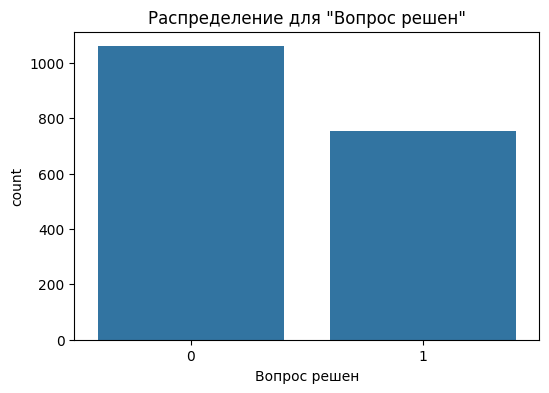


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è '–õ–∏—à–Ω–µ–µ':
–õ–∏—à–Ω–µ–µ
0    1550
1     265
Name: count, dtype: int64


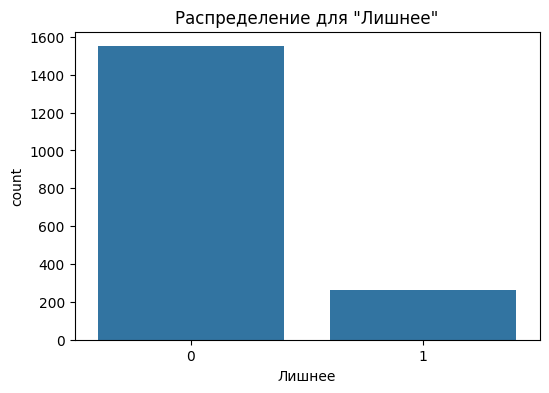


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è '–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏':
–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏
0    1605
1     210
Name: count, dtype: int64


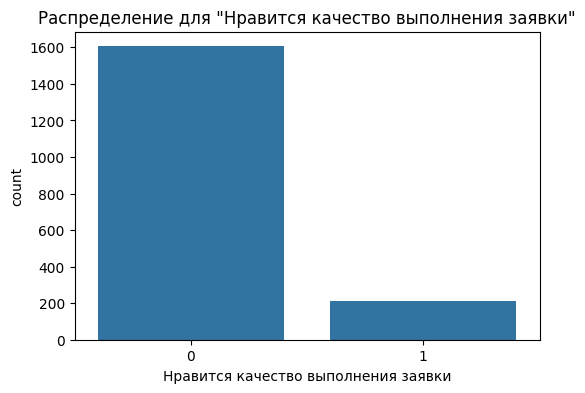


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è '–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤':
–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤
0    1455
1     360
Name: count, dtype: int64


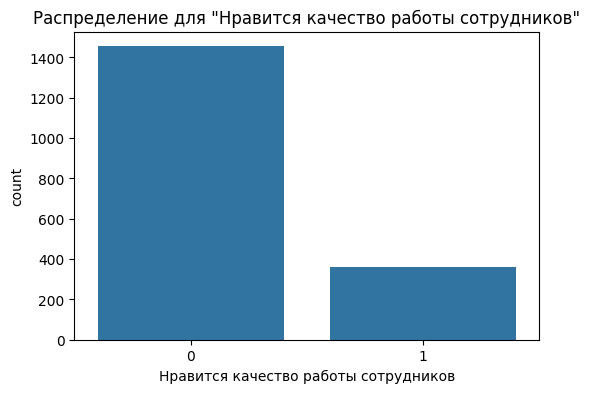


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è '–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫':
–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫
0    1111
1     704
Name: count, dtype: int64


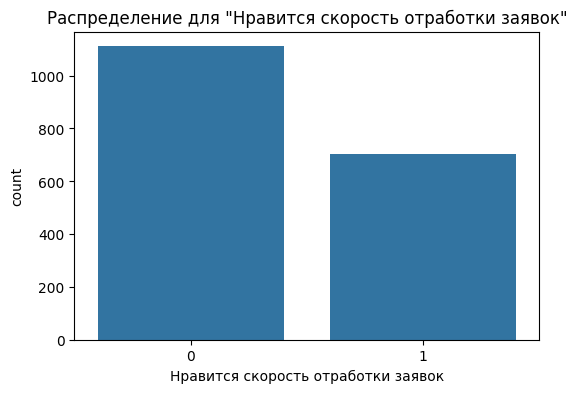


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è '–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏':
–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏
0    1338
1     477
Name: count, dtype: int64


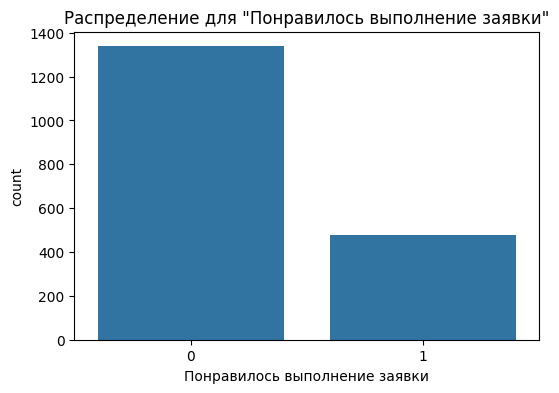

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df = pd.read_csv("/content/processed_comments.csv")

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö (–∫–∞—Ç–µ–≥–æ—Ä–∏–π)
target_columns = [
    '–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω',
    '–õ–∏—à–Ω–µ–µ',
    '–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏',
    '–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤',
    '–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫',
    '–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏'
]

# –ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤
for col in target_columns:
    print(f"\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è '{col}':")
    print(df[col].value_counts())
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è "{col}"')
    plt.show()

In [4]:


# –ï—Å–ª–∏ —É —Ç–µ–±—è –æ—Ç–¥–µ–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –ø–æ –∫–ª–∞—Å—Å–∞–º (0/1):
label_cols = ['–í–æ–ø—Ä–æ—Å —Ä–µ—à–µ–Ω', '–õ–∏—à–Ω–µ–µ',
    '–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞—è–≤–∫–∏',
    '–ù—Ä–∞–≤–∏—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤',
    '–ù—Ä–∞–≤–∏—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å –æ—Ç—Ä–∞–±–æ—Ç–∫–∏ –∑–∞—è–≤–æ–∫',
    '–ü–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏']
texts = df['processed_comment'].tolist()
labels = df[label_cols].values  # numpy array —Å 0/1

# –ò–ª–∏ –µ—Å–ª–∏ labels –≤ –æ–¥–Ω–æ–π –∫–æ–ª–æ–Ω–∫–µ —Å—Ç—Ä–æ–∫–∞-—Å–ø–∏—Å–æ–∫, –Ω—É–∂–Ω–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å
# import ast
# df['labels'] = df['labels'].apply(ast.literal_eval)
# labels = df['labels'].tolist()


In [5]:
!pip install iterative-stratification


In [6]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
import numpy as np

X = np.array(texts)
y = labels

mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# –î–ª—è –ø—Ä–∏–º–µ—Ä–∞ –≤–æ–∑—å–º—ë–º –ø–µ—Ä–≤—ã–π —Ä–∞–∑–±–∏–µ–Ω–∏–µ
for train_index, val_index in mskf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    break


In [7]:
import torch

# y_train ‚Äî numpy array, shape (N, num_classes)

pos_weight = torch.tensor(
    [(y_train[:, i] == 0).sum() / (y_train[:, i] == 1).sum() for i in range(y_train.shape[1])],
    dtype=torch.float
)


In [8]:
!pip install --upgrade transformers

In [9]:
!pip install huggingface_hub[hf_xet]


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.2/5.2 MB 23.4 MB/s eta 0:00:00


In [11]:
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class MultiLabelDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        labels = self.labels[idx].astype(float)
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),  # (max_len)
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(labels, dtype=torch.float)
        }

train_dataset = MultiLabelDataset(X_train, y_train, tokenizer)
val_dataset = MultiLabelDataset(X_val, y_val, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=y_train.shape[1],
    problem_type="multi_label_classification"
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# –†–∞—Å—Å—á–∏—Ç–∞–µ–º pos_weight –¥–ª—è BCEWithLogitsLoss
pos_weight = pos_weight.to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

optimizer = AdamW(model.parameters(), lr=2e-5)

# –ü—Ä–æ—Å—Ç–æ–π —Ü–∏–∫–ª –æ–±—É—á–µ–Ω–∏—è –Ω–∞ 1 —ç–ø–æ—Ö—É

model.train()
for batch in train_loader:
    optimizer.zero_grad()
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits

    loss = criterion(logits, labels)
    loss.backward()
    optimizer.step()

print("Epoch done.")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch done.


In [13]:
from sklearn.metrics import roc_auc_score

# preds ‚Äî –º–æ–¥–µ–ª—å–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π, shape = (num_samples, num_classes)
# targets ‚Äî –∏—Å—Ç–∏–Ω–Ω—ã–µ –º–µ—Ç–∫–∏ (0 –∏–ª–∏ 1), shape = (num_samples, num_classes)

model.eval()
all_targets = []
all_preds = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        probs = torch.sigmoid(logits)
        all_preds.append(probs.cpu().numpy())
        all_targets.append(labels.cpu().numpy())

all_preds = np.vstack(all_preds)
all_targets = np.vstack(all_targets)

roc_auc = roc_auc_score(all_targets, all_preds, average='macro')
print(f'Validation ROC-AUC: {roc_auc:.4f}')


Validation ROC-AUC: 0.7550


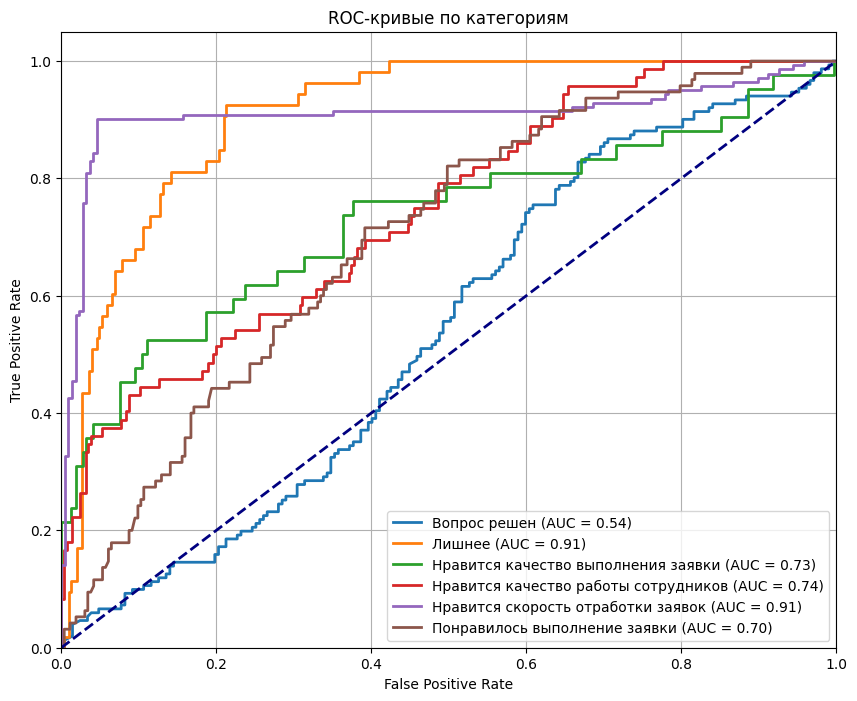

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import torch

model.eval()
all_labels = []
all_probs = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probs = torch.sigmoid(logits)

        all_labels.append(labels.cpu().numpy())
        all_probs.append(probs.cpu().numpy())

labels = np.vstack(all_labels)
probs = np.vstack(all_probs)

# –°—Ç—Ä–æ–∏–º ROC-–∫—Ä–∏–≤—ã–µ
plt.figure(figsize=(10, 8))
for i in range(len(label_columns)):
    fpr, tpr, _ = roc_curve(labels[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{label_columns[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-–∫—Ä–∏–≤—ã–µ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º')
plt.legend(loc='lower right')
plt.grid()
plt.show()
